In [1]:
import sys
import os
import numpy as np
from importlib import reload

sys.path.insert(0, '../../src')
import deepgeo.dataset.rasterizer as rstzr
import deepgeo.common.filesystem as fs
import deepgeo.common.visualization as vis

reload(rstzr)
reload(fs)
reload(vis)

%matplotlib inline

In [2]:
# Input Files
DATA_DIR = '/home/raian/doutorado/Dados/generated'
shape_file = os.path.join(DATA_DIR, 'Prodes_mosaic.shp')
rasters_dir = os.path.join(DATA_DIR, 'images_5bands')
raster_files = [os.path.join(rasters_dir, 'stacked_mosaic_2013_2014.tif'),
                os.path.join(rasters_dir, 'stacked_mosaic_2014_2015.tif'),
                os.path.join(rasters_dir, 'stacked_mosaic_2015_2016.tif'),
                os.path.join(rasters_dir, 'stacked_mosaic_2016_2017.tif'),
                os.path.join(rasters_dir, 'stacked_mosaic_2017_2018.tif')]

classes_of_interest = [['d2014'], ['d2015'], ['d2016'], ['d2017'], ['d2018']]
non_class = 'not_deforestation'
class_column = 'class_name'
class_names = ['not_deforestation', 'deforestation']

# Output Files
output_path = os.path.join(DATA_DIR, 'cloudless_labels')
fs.mkdir(output_path)
out_labels = [os.path.join(output_path, 'labels_cloudless_2014.tif'),
              os.path.join(output_path, 'labels_cloudless_2015.tif'),
              os.path.join(output_path, 'labels_cloudless_2016.tif'),
              os.path.join(output_path, 'labels_cloudless_2017.tif'),
              os.path.join(output_path, 'labels_cloudless_2018.tif')]

SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 --]
TYPE:  int32
SHAPE:  (11534, 13587, 1)
UNIQUE:  [1 2 --]
TYPE:  int32


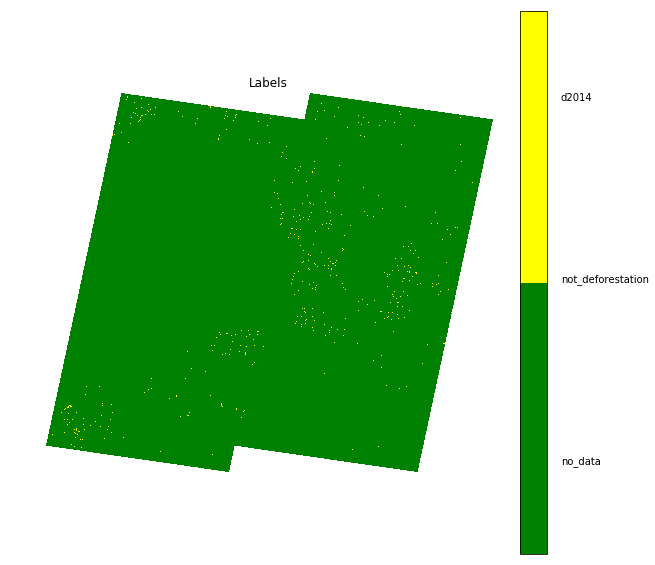

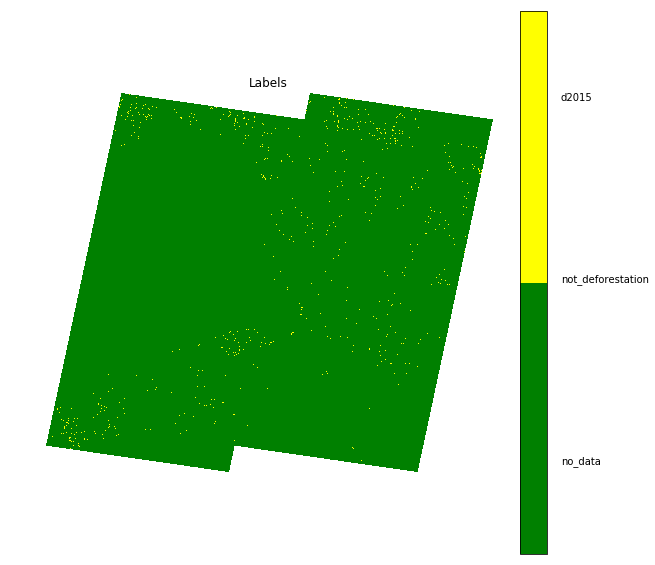

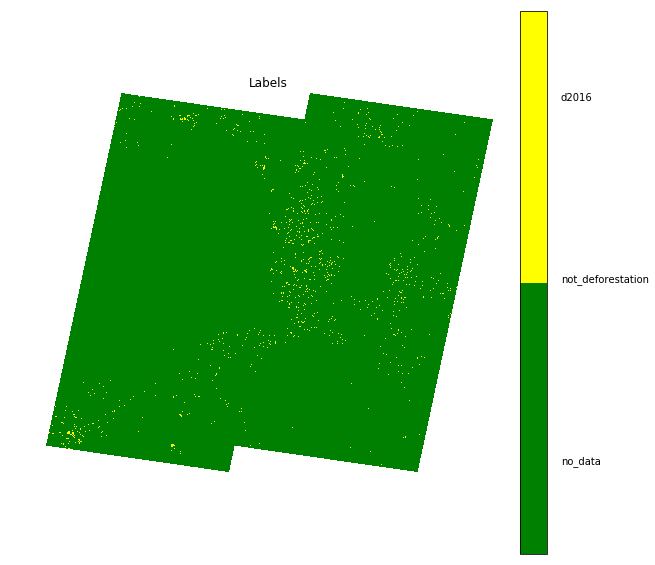

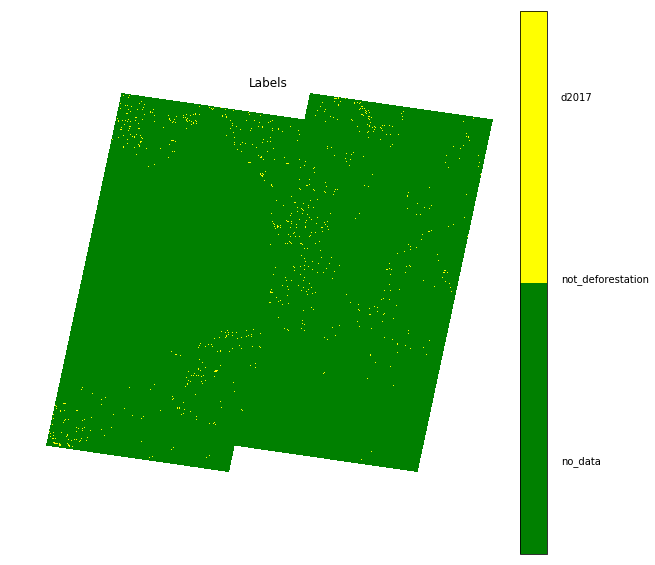

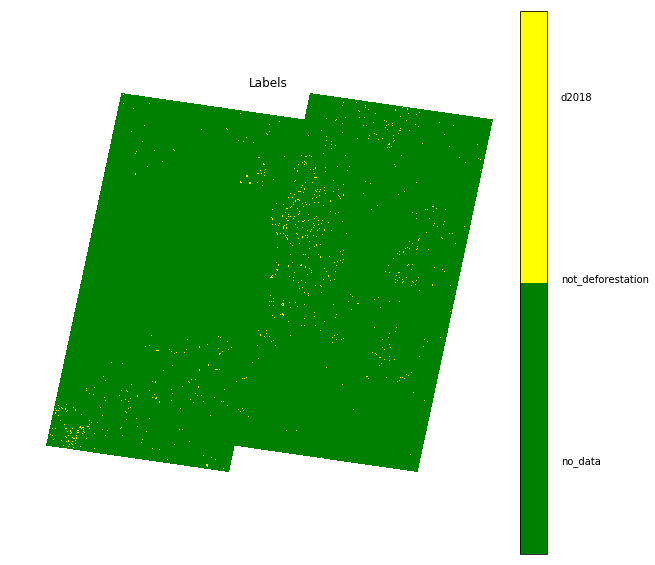

In [3]:
for year in range(0, len(classes_of_interest)):
    rasterizer = rstzr.Rasterizer(shape_file,
                                  raster_files[year],
                                  class_column,
                                  classes_interest=classes_of_interest[year],
                                  non_class_name=non_class)

    rasterizer.collect_class_names()
    rasterizer.rasterize_layer()
    m_class_names = ['no_data'] + rasterizer.get_class_names()
    rasterizer.remove_labels_under_cloud(pos_qa=6, new_label=1)
    rasterized_layer = rasterizer.get_labeled_raster()
    rasterizer.save_labeled_raster_to_gtiff(out_labels[year])
    
    print('SHAPE: ', rasterized_layer.shape)
    print('UNIQUE: ', np.unique(rasterized_layer))
    print('TYPE: ', rasterized_layer.dtype)
    
    vis.plot_labels(rasterized_layer, m_class_names, colors=["green", "yellow"])